<a href="https://colab.research.google.com/github/IsaRodriguez99/laboratorios/blob/main/Proyecto_Limon_Tahiti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introducción:**
El presente proyecto tiene como objetivo principal analizar y predecir la cantidad de limones tahití que se venderán a diferentes clientes en los próximos 3 meses. Para lograr esto, se utilizará una base de datos que contiene información detallada sobre las ventas de cítricos, incluyendo variables como el cliente, el valor unitario del limón y el mes de producción.



**Hipótesis:**
Basándonos en los datos disponibles y teniendo en cuenta la naturaleza estacional de la producción de limón tahití, planteamos la hipótesis de que existe una relación significativa entre el cliente, el valor unitario del limón y el mes de producción, y que esta relación puede ser utilizada para predecir con precisión la cantidad de limones que cada cliente comprará en los próximos 3 meses.

A lo largo del proyecto, se llevará a cabo un proceso de análisis exploratorio de datos para comprender mejor las características de la base de datos, se realizará un modelado predictivo utilizando técnicas de regresión lineal y se evaluará la precisión de las predicciones obtenidas. 

Además, se explorarán visualizaciones y gráficos que permitan visualizar de manera efectiva la relación entre las variables involucradas y faciliten la interpretación de los resultados.

Mediante este proyecto, se espera proporcionar información valiosa a mi empresa sobre las expectativas de venta de limones tahití para cada cliente, lo que nos permitirá tomar decisiones informadas en términos de planificación de producción, gestión de inventario y estrategias de marketing. Además, se sentará un precedente para la aplicación de técnicas de análisis de datos en el contexto de la industria de los cítricos, demostrando su potencial para mejorar la toma de decisiones y optimizar los resultados comerciales.

# Procedimiento de Data Wrangling

Importación de las librerias que utilizaré para la ejecución del Proyecto

In [ ]:
#Librerias que estaré utilizando para el manejo de mis datos
from google.colab import files 
import pandas as pd                                # Se trabaja todo lo que es la estructura de los datos           
import statsmodels.formula.api as smf              # Permite ajustar modelos estadísticos utilizando fórmulas de estilo R
import numpy as np                                 # representa matrices multidimensionales, equivalentes a las matrices del R
from matplotlib import pyplot                      # Permite la generación de gráficos
from sklearn.linear_model import LinearRegression  # sklearn es una libreria que cuenta con algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad          
from sklearn import metrics                        # sklearn es una libreria que cuenta con algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad 
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#Carga del archivo
uploaded = files.upload()

Saving Ventas_Citricos.csv to Ventas_Citricos.csv


In [112]:
#Carga del archivo
proyecto = pd.read_csv('Ventas_Citricos.csv', sep=';')
print(proyecto)

     Fecha de Producccion Unidad Productiva                       Cliente  \
0              12/01/2021      La Ponderosa                  Octavio Díaz   
1              12/01/2021        Cristalina         Surtifruver El Tomate   
2               9/01/2021      La Ponderosa            Juan Carlos Montes   
3              10/01/2021      La Ponderosa            Juan Carlos Montes   
4              11/01/2021         Los Andes                   Merca Plaza   
...                   ...               ...                           ...   
1485           15/03/2023         Los Andes                   Merca Plaza   
1486           15/03/2023         Los Andes                   Merca Plaza   
1487           15/03/2023      La Ponderosa                  Octavio Díaz   
1488           15/03/2023      La Ponderosa  Distribuidora La Mejor Fruta   
1489           15/03/2023        Cristalina                   Merca Plaza   

                  Producto     Tipo  Cantidad Unidad de Medida  \
0     Lim

In [113]:
# Revisamos la cantidad de filas, y columnas con la cuenta el Dataset
print(proyecto.shape)

(1490, 13)


In [114]:
#Observo información sobre los datos
print(proyecto.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Fecha de Producccion  1490 non-null   object
 1   Unidad Productiva     1490 non-null   object
 2   Cliente               1490 non-null   object
 3   Producto              1490 non-null   object
 4   Tipo                  1490 non-null   object
 5   Cantidad              1490 non-null   int64 
 6   Unidad de Medida      1490 non-null   object
 7   Valor Unitario        1490 non-null   int64 
 8   Forma de pago         1490 non-null   object
 9   Observaciones         1 non-null      object
 10  Fecha de pago         1490 non-null   object
 11  Total Kgs             1490 non-null   int64 
 12  Total Venta           1490 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 151.5+ KB
None


In [115]:
#Renombro las columnas
proyecto.columns= ['Fecha_Produccion','Unidad_Productiva','Cliente','Producto','Calidad','Cantidad','Unidad_Medida','Valor_Unitario','Forma_Pago','Observaciones','Fecha_Pago','Total_Kgs','Total_Venta']


  **Análisis de Nulos**

In [116]:
#Cantidad de datos faltantes por columna
miss_values_count = proyecto.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]
print(miss_values_count)

Observaciones    1489
dtype: int64


In [117]:
#Eliminamos las columnas Observaciones y Unidad de Medida para facilitar el analisis
proyecto = proyecto.drop(columns=['Observaciones'])

In [118]:
proyecto = proyecto.drop(columns=['Unidad_Medida'])

**Revisamos información sobre datos duplicados**

In [ ]:
#Revisamos información sobre datos duplicados
proyecto[proyecto.duplicated()].count()

Fecha_Produccion     0
Unidad_Productiva    0
Cliente              0
Producto             0
Calidad              0
Cantidad             0
Valor_Unitario       0
Forma_Pago           0
Fecha_Pago           0
Total_Kgs            0
Total_Venta          0
dtype: int64

In [ ]:
#Convertimos las columnas de Fecha de Produccion y Fecha de Pago a un tipo de dato datetime
proyecto['Fecha_Produccion'] = pd.to_datetime(proyecto['Fecha_Produccion'], format='%d/%m/%Y')
proyecto['Fecha_Pago'] = pd.to_datetime(proyecto['Fecha_Pago'], format='%d/%m/%Y')

In [ ]:
proyecto.dtypes

Fecha_Produccion     datetime64[ns]
Unidad_Productiva            object
Cliente                      object
Producto                     object
Calidad                      object
Cantidad                      int64
Valor_Unitario                int64
Forma_Pago                   object
Fecha_Pago           datetime64[ns]
Total_Kgs                     int64
Total_Venta                   int64
dtype: object

In [ ]:
proyecto.head(10)

,Fecha_Produccion,Unidad_Productiva,Cliente,Producto,Calidad,Cantidad,Valor_Unitario,Forma_Pago,Fecha_Pago,Total_Kgs,Total_Venta
0,2021-01-12,La Ponderosa,Octavio Díaz,Limón Tahití Primera,Primera,720,500,Efectivo,2023-03-15,720,360000
1,2021-01-12,Cristalina,Surtifruver El Tomate,Limón Acaro,Primera,500,100,Efectivo,2023-03-15,500,50000
2,2021-01-09,La Ponderosa,Juan Carlos Montes,Limón Tahití Primera,Tercera,600,400,Efectivo,2023-03-15,600,240000
3,2021-01-10,La Ponderosa,Juan Carlos Montes,Limón Acaro,Primera,600,100,Consignación,2023-03-15,600,60000
4,2021-01-11,Los Andes,Merca Plaza,Limón Tahití Primera,Segunda,660,500,Efectivo,2023-03-14,660,330000
5,2021-01-13,Los Andes,Elias Oampo,Limón Acaro,Primera,600,100,Efectivo,2023-03-14,600,60000
6,2021-02-13,La Ponderosa,Mecados Pereira,Arrayana Primera,Primera,1440,450,Consignación,2023-03-14,1440,648000
7,2021-02-10,La Ponderosa,Octavio Díaz,Arrayana Segunda,Segunda,140,100,Consignación,2023-03-14,140,14000
8,2021-02-11,Los Andes,Janeth Girlado,Limón Tahití Primera,Primera,400,500,Efectivo,2023-03-14,400,200000
9,2021-01-12,Cristalina,Merca Plaza,Limón Tahití Primera,Primera,1100,400,Consignación,2023-03-14,1100,440000


**Análisis Exploratorio de Variables Categoricas a Numericas**




In [ ]:
columnas_categoricas = ['Calidad']  # Solo se incluye la columna 'Calidad' en la lista

# Convertir la columna 'Calidad' a tipo 'category'
proyecto['Calidad'] = proyecto['Calidad'].astype('category')

# Convertir las demás columnas a valores numéricos
columnas_numericas = ['Cliente', 'Unidad_Productiva', 'Producto']  # Se excluye 'Calidad' de la lista
proyecto[columnas_numericas] = proyecto[columnas_numericas].apply(lambda x: x.astype('category').cat.codes)

print(proyecto)
proyecto.dtypes

     Fecha_Produccion  Unidad_Productiva  Cliente  Producto  Calidad  \
0          2021-01-12                  1       11         5  Primera   
1          2021-01-12                  0       12         4  Primera   
2          2021-01-09                  1        8         5  Tercera   
3          2021-01-10                  1        8         4  Primera   
4          2021-01-11                  2       10         5  Segunda   
...               ...                ...      ...       ...      ...   
1485       2023-03-15                  2       10         0  Segunda   
1486       2023-03-15                  2       10         0  Primera   
1487       2023-03-15                  1       11         5  Primera   
1488       2023-03-15                  1        4         5  Segunda   
1489       2023-03-15                  0       10         4  Tercera   

      Cantidad  Valor_Unitario     Forma_Pago Fecha_Pago  Total_Kgs  \
0          720             500       Efectivo 2023-03-15        

Fecha_Produccion     datetime64[ns]
Unidad_Productiva              int8
Cliente                        int8
Producto                       int8
Calidad                    category
Cantidad                      int64
Valor_Unitario                int64
Forma_Pago                   object
Fecha_Pago           datetime64[ns]
Total_Kgs                     int64
Total_Venta                   int64
dtype: object

In [ ]:
#Extraigo de la columna Fecha de Produccion solo el mes, dia y año numericamente
proyecto['Mes_Produccion'] = proyecto['Fecha_Produccion'].dt.month
proyecto['Día_Produccion'] = proyecto['Fecha_Produccion'].dt.day
proyecto['Año_Produccion'] = proyecto['Fecha_Produccion'].dt.year
print(proyecto['Mes_Produccion'])


0       1
1       1
2       1
3       1
4       1
       ..
1485    3
1486    3
1487    3
1488    3
1489    3
Name: Mes_Produccion, Length: 1490, dtype: int64


In [ ]:
proyecto.head(10)

,Fecha_Produccion,Unidad_Productiva,Cliente,Producto,Calidad,Cantidad,Valor_Unitario,Forma_Pago,Fecha_Pago,Total_Kgs,Total_Venta,Mes_Produccion,Día_Produccion,Año_Produccion
0,2021-01-12,1,11,5,Primera,720,500,Efectivo,2023-03-15,720,360000,1,12,2021
1,2021-01-12,0,12,4,Primera,500,100,Efectivo,2023-03-15,500,50000,1,12,2021
2,2021-01-09,1,8,5,Tercera,600,400,Efectivo,2023-03-15,600,240000,1,9,2021
3,2021-01-10,1,8,4,Primera,600,100,Consignación,2023-03-15,600,60000,1,10,2021
4,2021-01-11,2,10,5,Segunda,660,500,Efectivo,2023-03-14,660,330000,1,11,2021
5,2021-01-13,2,5,4,Primera,600,100,Efectivo,2023-03-14,600,60000,1,13,2021
6,2021-02-13,1,9,2,Primera,1440,450,Consignación,2023-03-14,1440,648000,2,13,2021
7,2021-02-10,1,11,3,Segunda,140,100,Consignación,2023-03-14,140,14000,2,10,2021
8,2021-02-11,2,6,5,Primera,400,500,Efectivo,2023-03-14,400,200000,2,11,2021
9,2021-01-12,0,10,5,Primera,1100,400,Consignación,2023-03-14,1100,440000,1,12,2021


**Exploratorio de Datos Numéricos**

In [ ]:
# Utilizamos el método describe() 
estadisticos = proyecto.describe()
# Formateamos los valores numéricos en formato decimal en la columna 'Total_venta'
estadisticos['Total_Venta'] = estadisticos['Total_Venta'].apply(lambda x: "{:.6f}".format(x) if pd.notnull(x) else x)
# Imprimimos los estadísticos descriptivos con los valores formateados
print(estadisticos)



       Unidad_Productiva      Cliente     Producto     Cantidad  \
count        1490.000000  1490.000000  1490.000000  1490.000000   
mean            0.968456     6.014094     4.311409   775.142953   
std             0.740064     3.839694     2.736160   847.853845   
min             0.000000     0.000000     0.000000     3.000000   
25%             0.000000     3.000000     2.000000   160.000000   
50%             1.000000     6.000000     5.000000   580.000000   
75%             2.000000     9.000000     5.000000  1040.000000   
max             2.000000    12.000000    11.000000  8575.000000   

       Valor_Unitario     Total_Kgs      Total_Venta  Mes_Produccion  \
count     1490.000000   1490.000000      1490.000000     1490.000000   
mean      1154.137584    831.706040    846583.268456        7.361074   
std       1334.195153   1045.276388   1577014.225096        3.258892   
min          1.000000      3.000000        20.000000        1.000000   
25%        400.000000    180.000000 

# Procedimiento EDA (Analisis Exploratorio de Datos)

In [ ]:
def pareto_chart_sum(dataframe, column, value, titulo):
    proyecto = dataframe.copy()  # Copia del DataFrame original
    
    proyecto[column] = proyecto[column].astype('int')  # Conversión de la columna a tipo entero
    
    # Tabla pivotada para agrupar los datos y calcular la suma de 'value' por 'column'
    proyecto = pd.pivot_table(dataframe,
                              values=value,
                              index=column,
                              aggfunc={value: pd.Series.sum})
    
    proyecto = proyecto.sort_values(by=value, ascending=False).copy()  # Ordenamiento descendente
    
    # Cálculo del porcentaje acumulado
    proyecto['cumporc'] = proyecto[value].cumsum() / proyecto[value].sum() * 100
    
    # Importar las bibliotecas necesarias
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go
    
    # Crear trazados de gráfico de barras
    trace_0 = go.Bar(
        x=proyecto.index,
        y=proyecto[value],
    )
    trace_1 = go.Scatter(
        x=proyecto.index,
        y=proyecto['cumporc'],
        mode="markers+lines",
        marker_color='indianred'
    )

    fig = go.Figure()  # Crear figura
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])  # Crear subplots con dos ejes Y
    
    fig.add_trace(trace_0, secondary_y=False)  # Añadir trazado de barras al primer eje Y
    fig.add_trace(trace_1, secondary_y=True)

    # Actualizar títulos y etiquetas de los ejes
    fig.update_yaxes(title_text=f"<b>{value}</b>", secondary_y=False, rangemode="tozero")
    fig.update_yaxes(title_text="<b>cumporc</b>", secondary_y=True, rangemode="tozero")
    fig.update_xaxes(type='category')

    fig.update_layout(
        title=f'{titulo}',  # Asignar título al gráfico
    )

    fig.show()  # Mostrar el gráfico
    display(proyecto.head(15))  # Mostrar tabla resumen de los datos


In [ ]:
for col in columnas_numericas:
    pareto_chart_sum(proyecto, col, 'Total_Venta', f'{col}s que más suman en ventas')

,Total_Venta,cumporc
Cliente,,
10,133066740,10.549055
6,117697200,19.879668
8,113803690,28.901618
1,111321720,37.726806
12,110606940,46.495328
4,105181690,54.833757
0,105059250,63.162478
2,98385720,70.962146
7,78256200,77.166018


,Total_Venta,cumporc
Unidad_Productiva,,
2,552290160,43.783589
1,393548180,74.982681
0,315570730,100.000000


,Total_Venta,cumporc
Producto,,
5,565637250,44.841698
9,213725650,61.785104
0,202293300,77.822193
2,177423250,91.887674
3,55791150,96.310597
4,28545970,98.573619
1,9973100,99.364251
10,2999700,99.602056
7,2887300,99.830951


**Analisis respecto a cantidades**

In [ ]:
for col in columnas_numericas:
    pareto_chart_sum(proyecto, col, 'Cantidad', f'{col}s que más suman mas cantidades')

,Cantidad,cumporc
Cliente,,
12,106690,9.237525
1,101798,18.051487
8,101462,26.836358
0,99415,35.443993
10,98390,43.962880
6,92127,51.939499
5,91334,59.847458
4,88379,67.499565
9,85276,74.883005


,Cantidad,cumporc
Unidad_Productiva,,
1,493366,42.717039
0,353210,73.298971
2,308387,100.000000


,Cantidad,cumporc
Producto,,
5,462376,40.033837
2,225683,59.574116
9,168013,74.121162
0,146244,86.783386
3,75107,93.286365
4,50710,97.676982
1,14964,98.972608
10,6954,99.574705
7,3208,99.852463


Al visualizar que el producto que más suma en venta y cantidades es el N° 5 que corresponde a 'Limón Tahití' tomo la decisión de realizar mi prediccion con este Producto

In [ ]:
# Eliminar filas que no contienen el número 5 en la columna "Producto"
proyecto_filtrado = proyecto[proyecto["Producto"] == 5].copy()

# Restablecer los índices del nuevo data set
proyecto_filtrado.reset_index(drop=True, inplace=True)

# Mostrar el nuevo data set después de eliminar las filas
print("\nNuevo data set después de eliminar las filas:")
print(proyecto_filtrado)


Nuevo data set después de eliminar las filas:
    Fecha_Produccion  Unidad_Productiva  Cliente  Producto  Calidad  Cantidad  \
0         2021-01-12                  1       11         5  Primera       720   
1         2021-01-09                  1        8         5  Tercera       600   
2         2021-01-11                  2       10         5  Segunda       660   
3         2021-02-11                  2        6         5  Primera       400   
4         2021-01-12                  0       10         5  Primera      1100   
..               ...                ...      ...       ...      ...       ...   
504       2023-03-13                  2        0         5  Segunda       600   
505       2023-03-14                  1       10         5  Segunda        20   
506       2023-03-14                  2        2         5  Primera       100   
507       2023-03-15                  1       11         5  Primera      1500   
508       2023-03-15                  1        4         5  Se

**Análisis de las ventas en el tiempo**

In [ ]:
#Calculando el total de venta de limón tahití
comparativo_años = pd.pivot_table(proyecto_filtrado,
                        values = 'Total_Venta',
                        columns=['Mes_Produccion'],
                        index = ['Año_Produccion'],
                        aggfunc={'Total_Venta':pd.Series.sum},
                        ).replace(np.nan, 0)
comparativos_años_en_millones = comparativo_años/1000000
comparativos_años_en_millones.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
comparativos_años_en_millones.style.background_gradient(cmap='GnBu',).format(precision=1)



,1,2,3,4,5,6,7,8,9,10,11,12
Año_Produccion,,,,,,,,,,,,
2021,1.4,6.3,0.0,12.5,9.7,51.2,74.9,63.7,47.3,53.2,149.6,71.0
2022,21.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023,0.0,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Con esta gráfica podemos observar el total de venta de limón Tahití en los años 2021, 2022 y 2023 y estos a su vez en los respectivos meses, por ejemplo, en febrero de 2021 hubo una venta de 6.3 millones de pesos y asi sucesivamente, los valores mas oscuros, es porque hubo un pico de ventas y 0 es porque no se vendió.





<ipython-input-92-16495fbd0dcc>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



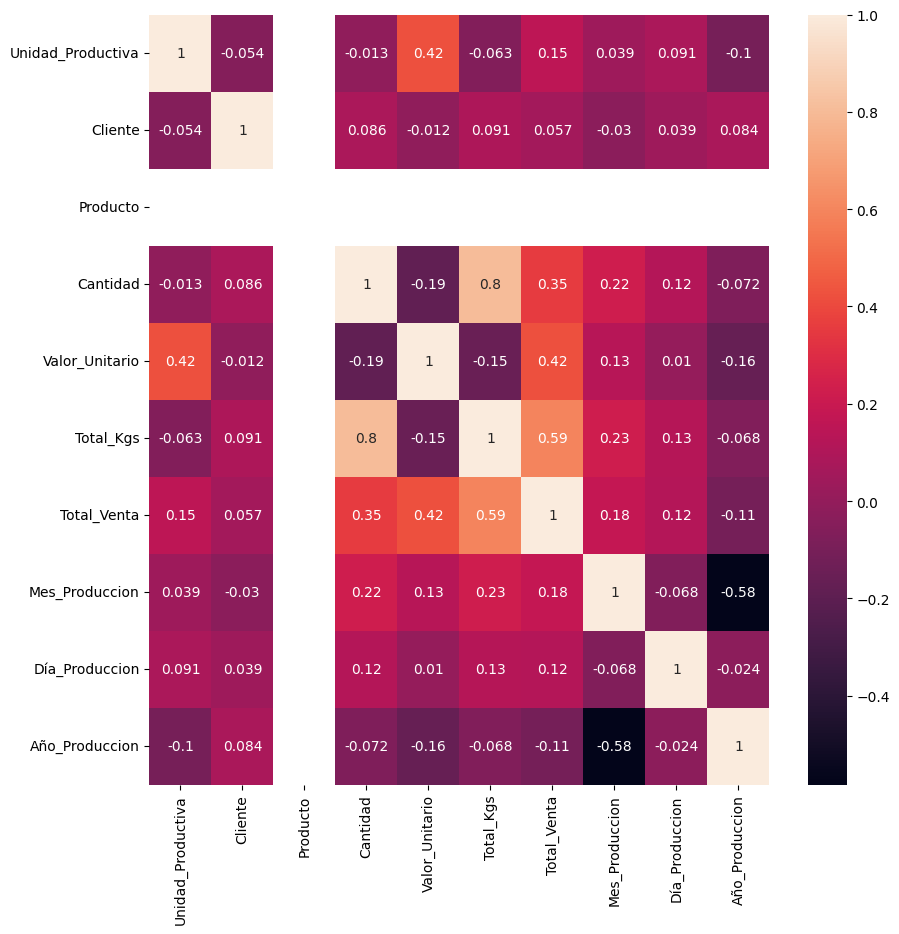

In [ ]:
# grafica de la correlacion
plt.figure(figsize=(10,10))
sns.heatmap(proyecto_filtrado.corr(),annot=True)
plt.show()

Con la gráfica de la correlación, observo que la Cantidad tiene una correlación significativa con Cliente(0.086), (porque aunque no sea muy alta es una variable importante para mi objetivo) y esta a su vez con Valor Unitario(0.42) y Mes_Produccuón, abordo estas tres variables ya que mi objetivo es predecir la Cantidad de Limón Tahití, y así puedo tener un enfoque mucho mas profundo para asi poder continuar con mi análisis.

**Aca empieza mi modelo predictivo**

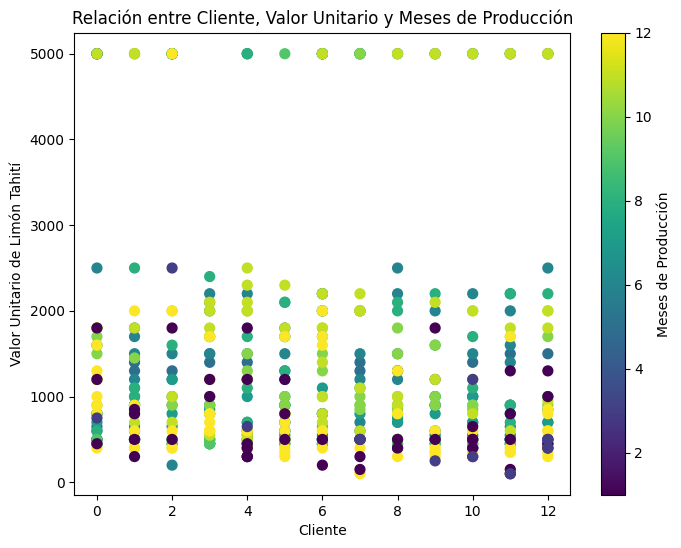

In [ ]:
import matplotlib.pyplot as plt

x1 = proyecto_filtrado['Cliente']
x2 = proyecto_filtrado['Valor_Unitario']
x3 = proyecto_filtrado['Mes_Produccion']
y = proyecto_filtrado['Cantidad']

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 6))

# Configurar el gráfico de dispersión
scatter = ax.scatter(x1, x2, c=x3, cmap='viridis', s=50)

# Configurar la barra de color para la variable de Meses de Producción
cbar = plt.colorbar(scatter)
cbar.set_label('Meses de Producción')

# Configurar los ejes y el título del gráfico
ax.set_xlabel('Cliente')
ax.set_ylabel('Valor Unitario de Limón Tahití')
ax.set_title('Relación entre Cliente, Valor Unitario y Meses de Producción')

# Mostrar el gráfico
plt.show()



En este gráfico de dispersión me permite visualizar la relación entre las variavles 'Cliente', 'Valor Unitario de los limones y los Meses de Producción. Los puntos individuales representan clientes específicos, y el color indica los meses de producción asociados.

**Primera maquetación del Modelo de Regresión Lineal Múltiple**

In [ ]:
y = proyecto_filtrado['Cantidad']
lm = LinearRegression()
X = proyecto_filtrado[['Cliente','Valor_Unitario', 'Mes_Produccion']]
lm.fit(X,y)
prediccion = lm.predict(X)
a = lm.intercept_
b = lm.coef_

Imprimiendo los resultados de la predicción

In [ ]:
print('Prediccion')
print('*'*100)
print(prediccion)     # Valores segun la prediccion
print('*'*100)
print(y)              # Valores actuales de la cantidad
print(lm.score(X,y))  # Retornamos el coeficiente de determinacion en la prediccion

Prediccion
****************************************************************************************************
[ 694.04972186  643.9003948   672.54704931  654.26775402  686.9057399
  546.75439127  532.43106402  718.77577168  753.90454406  933.10526976
  789.73054386  925.92592446  768.22787131  811.23321641  639.97979011
  811.23321641  768.99582541  660.71450856  746.72519876  890.09992465
  718.77577168 -120.8893579   811.23321641  682.21718111  660.71450856
  682.21718111  789.73054386  667.85849052  811.23321641  918.74657916
  918.74657916  646.35581797  897.24390661  842.89106817  713.94575954
  785.59775915  821.45912229  678.15512307  713.94575954  635.07905129
  721.0897415   821.38839562  656.58172384  620.7203607   814.24441366
  785.59775915  685.22837835  670.86968776  663.7257058   211.32086216
  764.0950866   749.736396    756.88037796  800.09790309  706.90786759
  828.81528427  817.64460761  882.25871527  914.79061113  932.33731566
 1011.16866056  828.81528427  896.511

In [ ]:
resultados ={'Real':proyecto_filtrado['Cantidad'],'Prediccion':prediccion}
result = pd.DataFrame(data=resultados)
print(result)

     Real  Prediccion
0     720  694.049722
1     600  643.900395
2     660  672.547049
3     400  654.267754
4    1100  686.905740
..    ...         ...
504   600  557.086387
505    20  707.499005
506   100  348.814647
507  1500  886.947274
508  1000  657.455768

[509 rows x 2 columns]


Con este codigo, obtengo mis cantidades reales y seguidamente en otra columna mis datos predictivos, visualizando que tiende a aumentar en el 505 aumentará de manera considerable.

Entrenaré mi Dataset un 70% y 30% 

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables independientes (X) y variable dependiente (y)
X = proyecto_filtrado[['Cliente', 'Valor_Unitario', 'Mes_Produccion']]
y = proyecto_filtrado['Cantidad']

# Dividir el dataset en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crear el modelo de regresión lineal
lm = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
lm.fit(x_train, y_train)

# Realizar las predicciones en el conjunto de prueba
y_pred = lm.predict(x_test)

# Calcular el intercepto y los coeficientes
a = lm.intercept_
b = lm.coef_

# Mostrar los resultados
print('Intercepto:', a)
print('Coeficientes:', b)


Intercepto: 473.335984512075
Coeficientes: [19.7900843  -0.11725813 60.24238313]


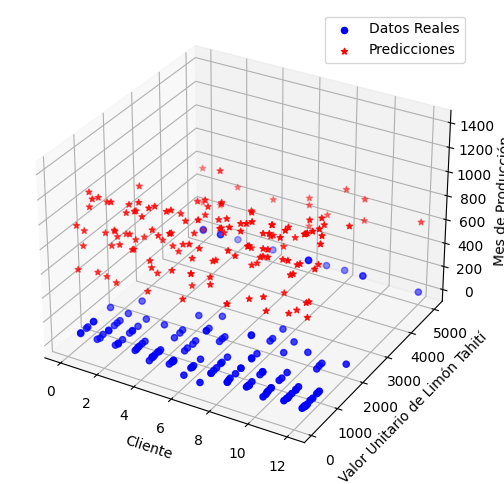

In [ ]:
# Crear figura y ejes 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar datos reales
ax.scatter(x_test['Cliente'], x_test['Valor_Unitario'], x_test['Mes_Produccion'], c='b', label='Datos Reales')

# Graficar predicciones
ax.scatter(x_test['Cliente'], x_test['Valor_Unitario'], y_pred, c='r', marker='*', label='Predicciones')

# Configurar etiquetas de los ejes
ax.set_xlabel('Cliente')
ax.set_ylabel('Valor Unitario de Limón Tahití')
ax.set_zlabel('Mes de Producción')

# Mostrar leyenda
ax.legend()

# Mostrar gráfico
plt.show()



En la sección azul son los datos reales, en el eje x1 se observa los diferentes clientes, los cuales me están generando un Valor_Unitario algunos muy constantes y otros mas considerables y en los Meses de Producición me muestra la cantidad por mes, y el los puntos rojos observo cuanto podrian llegar a pruducir mis clientes a lo largo de los 12 meses del año, se muestran mas constantes en un valor unitario, lo que me lleva a interpretar y analizar que pasarán a ser clientes a los que le venda al por mayor.

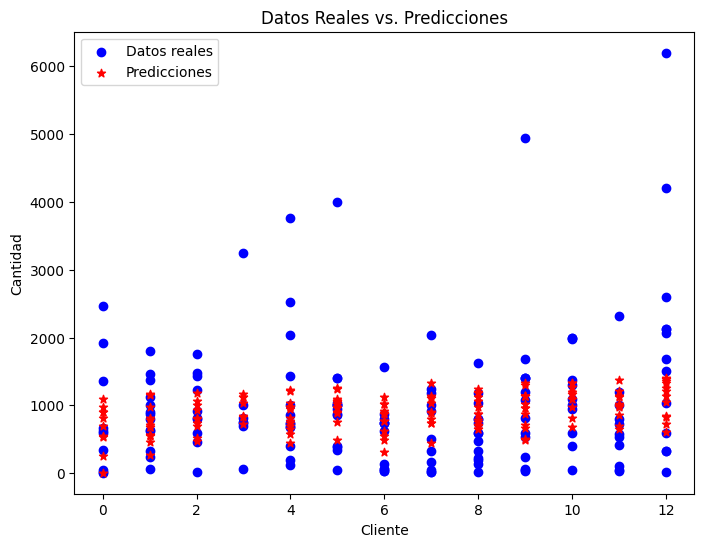

In [ ]:
import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar datos reales
ax.scatter(x_test['Cliente'], y_test, c='b', label='Datos reales')

# Graficar datos predictivos
ax.scatter(x_test['Cliente'], y_pred, c='r', marker='*', label='Predicciones')

# Configurar ejes y etiquetas
ax.set_xlabel('Cliente')
ax.set_ylabel('Cantidad')
ax.set_title('Datos Reales vs. Predicciones')

# Mostrar leyenda
ax.legend()

# Mostrar gráfica
plt.show()


**Creo un dataframe donde se encuentra la prediccion de la cantidad de limones que comprará cada cliente en los proximos 3 meses. **



In [ ]:
# Realizar las predicciones para los próximos 3 meses
predicciones_proximos_3_meses = lm.predict(X)  # Utilizar los datos originales X

# Crear el dataframe con las predicciones
df_predicciones_proximos_3_meses = pd.DataFrame({'Cliente': proyecto_filtrado['Cliente'], 'Prediccion_Cantidad': predicciones_proximos_3_meses})

# Ordenar el dataframe por el cliente
df_predicciones_proximos_3_meses = df_predicciones_proximos_3_meses.sort_values('Cliente')

# Mostrar el dataframe de predicciones
print(df_predicciones_proximos_3_meses)




     Cliente  Prediccion_Cantidad
281        0           899.872617
168        0           801.226160
457        0          1055.534823
450        0          1149.341329
31         0           643.950638
..       ...                  ...
288       12          1113.902002
392       12          1339.919088
393       12          1262.087985
363       12          1162.418572
266       12           666.707782

[509 rows x 2 columns]


Este código utilizo el modelo entrenado lm y los datos originales X para realizar las predicciones de la cantidad de limones que comprará cada cliente en los próximos 3 meses. Luego,creo un dataframe llamado 'df_predicciones_proximos_3_meses' que contendrá la información del cliente y la predicción de la cantidad de limones. 

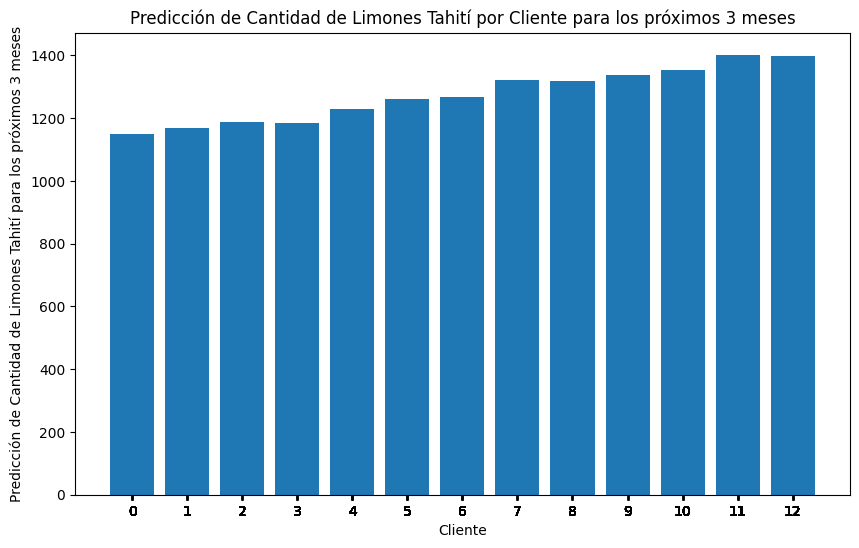

In [ ]:
# Obtener los datos del dataframe
clientes =df_predicciones_proximos_3_meses['Cliente']
Prediccion_Cantidad = df_predicciones_proximos_3_meses['Prediccion_Cantidad']

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(clientes, Prediccion_Cantidad)
plt.xlabel('Cliente')
plt.ylabel('Predicción de Cantidad de Limones Tahití para los próximos 3 meses')
plt.title('Predicción de Cantidad de Limones Tahití por Cliente para los próximos 3 meses')
plt.xticks(clientes)  # Ajustar las etiquetas del eje x

plt.show()


**Conclusión:** En el proyecto de venta de cítricos, he realizado varias etapas importantes, como Data Wrangling, Análisis Exploratorio de Datos (EDA) y la construcción de un Modelo Predictivo para predecir la cantidad de limón tahití que cada cliente venderá en los próximos 3 meses.

Llevando a cabo cada proceso de manera exhaustiva para obtener resultados; los cuales me indican que la cantidad de limón tahití vendida por cada cliente está influenciada principalmente por el valor unitario y la temporada y/o mes de producción, y que los clientes 11('Octavio Díaz) y 12('Surtifruver El Tomate') serán los que más limón tahití producirán en los próximos 3 meses (1400 cantidad). 
Esto puede ser útil para nuestra Empresa, ya que nos servirá para planificar la producción y la venta de limón tahití en el futuro.